In [1]:
# To import the necessary libraries needed
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import confusion_matrix

Reading/Loading the dataset and store it in Data Frames

In [2]:
# To load the TMDB 5000 datasets (OPEN SOURCE dataset which was used from KAGGLE)
df_cred = pd.read_csv("../data/tmdb_5000_credits.csv")
df_mov = pd.read_csv("../data/tmdb_5000_movies.csv")

Checking the Dataframe Dimensions (rows,columns)

In [3]:
""" To get the dimensions (no.of rows and columns) of the credits and movies data sets. Credits dataset has 4803 rows and 4 columns and movies dataset has 4803 rows and 20 columns """
df_cred.shape, df_mov.shape

((4803, 4), (4803, 20))

## DATA PREPROCESSING

Renaming the Column Name inorder to Merge them Together

In [4]:
# To rename the movie_id column of credits dataset into id (since both has different names for id)
df_cred.rename(columns = {'movie_id':'id'}, inplace = True)

Merging two DataFrames into one with the common column 'id'

In [5]:
# To merge the two dataframes together and store in a dataframe
df = df_cred.merge(df_mov, on = 'id')

Checking the DataFrame Information (Columns and its DataTypes)

In [6]:
# To get the information about the data type of the columns of the merged dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4803 non-null   int64  
 1   title_x               4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   crew                  4803 non-null   object 
 4   budget                4803 non-null   int64  
 5   genres                4803 non-null   object 
 6   homepage              1712 non-null   object 
 7   keywords              4803 non-null   object 
 8   original_language     4803 non-null   object 
 9   original_title        4803 non-null   object 
 10  overview              4800 non-null   object 
 11  popularity            4803 non-null   float64
 12  production_companies  4803 non-null   object 
 13  production_countries  4803 non-null   object 
 14  release_date          4802 non-null   object 
 15  revenue              

##  EDA - Explorative Data Analysis

Plotting all the Title Texts available in the Dataset using WordCloud

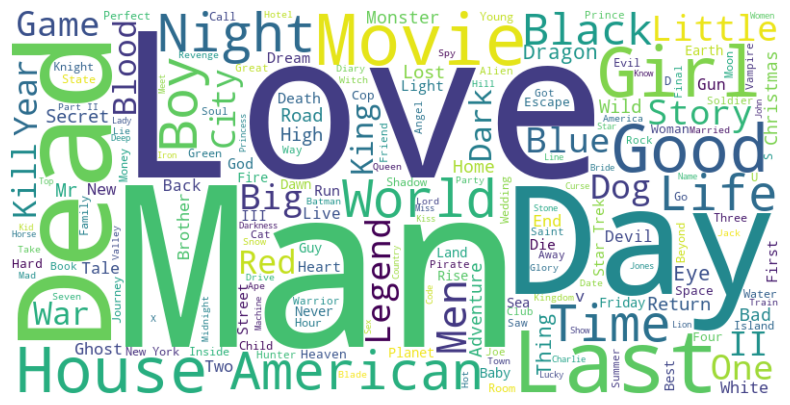

In [7]:
# Combine all titles into a single text string
titles_text = ' '.join(df["title_x"])

# Generate a WordCloud object with specified settings
wordcloud = WordCloud(background_color = 'white', width = 800, height = 400, colormap = 'viridis').generate(titles_text)

# Set up the plot figure
plt.figure(figsize = (10, 5))
# Display the word cloud image using imshow
plt.imshow(wordcloud, interpolation = 'bilinear')
# Turn off axis labels and ticks
plt.axis('off')  
# To show the plot
plt.show()

Handling Missing Values

In [8]:
# To drop null overview columns
df.dropna(subset = ['overview'], inplace = True)

Feature Engineering - Creating new features from the existing ones

In [9]:
# To filter out all the columns needed to train the model
df = df[['id', 'title_x', 'genres', 'overview', 'cast', 'crew']]

Extracting the Genre feature and creating new dataframe

In [10]:
# To access the genre column
df_genres = df['genres']

In [11]:
# check the needed columns datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        4800 non-null   int64 
 1   title_x   4800 non-null   object
 2   genres    4800 non-null   object
 3   overview  4800 non-null   object
 4   cast      4800 non-null   object
 5   crew      4800 non-null   object
dtypes: int64(1), object(5)
memory usage: 262.5+ KB


In [12]:
# To see the available column data for the first record - of movie Avatar
df.head(1)

,id,title_x,genres,overview,cast,crew
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [13]:
# To get the genre information of the first record
df.genres[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

Checking the Null value Columns in the DataSet

In [14]:
# Function to count the occurrences of '[]' values in a column
def count_empty_list(column):
    return sum(value == '[]' for value in column)

# Apply the function to each column
empty_list_counts = df.apply(count_empty_list)

# Get the column names with '[]' values
columns_with_empty_list = empty_list_counts[empty_list_counts > 0].index.tolist()

print("Columns with '[]' values:", columns_with_empty_list)
print("Counts of '[]' values in each column:")
for column_name, count in empty_list_counts.items():
    print(f"{column_name}: {count}")

Columns with '[]' values: ['genres', 'cast', 'crew']
Counts of '[]' values in each column:
id: 0
title_x: 0
genres: 28
overview: 0
cast: 42
crew: 28


In [15]:
# Drop rows where the 'genres' column is empty
df = df[df['genres'] != '[]']

# Reset index after dropping rows
df.reset_index(drop = True, inplace = True)

In [16]:
# Drop rows where the 'cast' column is empty
df = df[df['cast'] != '[]']

# Reset index after dropping rows
df.reset_index(drop = True, inplace = True)

In [17]:
# Drop rows where the 'crew' column is empty
df = df[df['crew'] != '[]']

# Reset index after dropping rows
df.reset_index(drop = True, inplace = True)

In [18]:
# Apply the function to each column
empty_list_counts = df.apply(count_empty_list)

# Get the column names with '[]' values
columns_with_empty_list = empty_list_counts[empty_list_counts > 0].index.tolist()

print("Columns with '[]' values:", columns_with_empty_list)
print("Counts of '[]' values in each column:")
for column_name, count in empty_list_counts.items():
    print(f"{column_name}: {count}")

Columns with '[]' values: []
Counts of '[]' values in each column:
id: 0
title_x: 0
genres: 0
overview: 0
cast: 0
crew: 0


In [19]:
all_genres = df['genres']

In [20]:
all_genres

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4735    [{"id": 878, "name": "Science Fiction"}, {"id"...
4736    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4737    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4738    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4739                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4740, dtype: object

In [21]:
genre_df = pd.DataFrame(all_genres)

In [22]:
genre_df

,genres
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
...,...
4735,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""..."
4736,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4737,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""..."
4738,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam..."


In [23]:
def extract_genre_names(genre_list_str):
    # Convert the string representation of a list to an actual list using eval
    genres = eval(genre_list_str)
    # Extract the 'name' attribute from each genre in the list and join them with commas
    return ','.join(genre['name'] for genre in genres)

In [24]:
# Apply the extract_genre_names function to the 'genres' column and create a new column 'all_genre'
genre_df['all_genre'] = genre_df['genres'].apply(extract_genre_names)

In [25]:
# Add a new column 'all_genre' to the df DataFrame
df['All Genres'] = genre_df['all_genre']

In [26]:
# Remove spaces from the 'All Genres' column by replacing them with an empty string
df['All Genres'] = df['All Genres'].str.replace(" ","")

Plotting all the Genre Names available in the Dataset using WordCloud

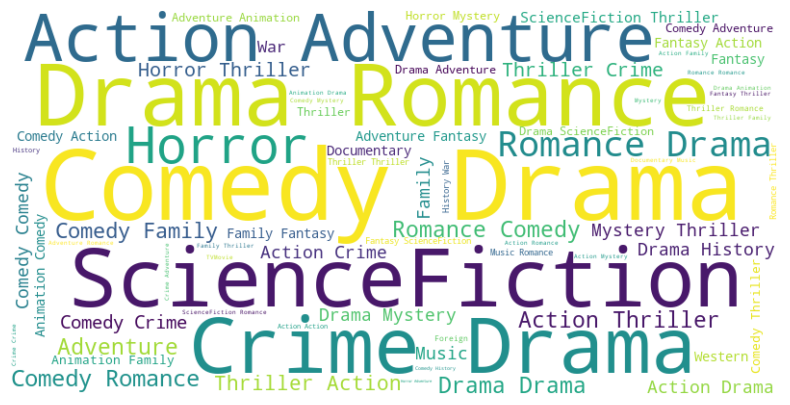

In [27]:
# Combine all genres into a single text string
genres_text = ','.join(df["All Genres"])

# Generate a WordCloud object with specified settings
wordcloud = WordCloud(background_color = 'white', width = 800, height = 400, colormap = 'viridis').generate(genres_text)

# Set up the plot figure
plt.figure(figsize=(10, 5))
# Display the word cloud image using imshow
plt.imshow(wordcloud, interpolation = 'bilinear')
# Turn off axis labels and ticks
plt.axis('off')  
# To show the plot
plt.show()

In [28]:
df.head(2)

,id,title_x,genres,overview,cast,crew,All Genres
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","Action,Adventure,Fantasy,ScienceFiction"
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","Adventure,Fantasy,Action"


In [29]:
# Extract the cast and crew column and assign it to cast_df and crew_df
cast_df = df['cast']
crew_df = df['crew']

In [30]:
# Convert the cast_df variable to a Pandas DataFrame
cast_df = pd.DataFrame(cast_df)

In [31]:
# Convert the crew_df variable to a Pandas DataFrame
crew_df = pd.DataFrame(crew_df)

In [32]:
cast_df

,cast
0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""..."
1,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa..."
2,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr..."
3,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba..."
4,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c..."
...,...
4735,"[{""cast_id"": 1, ""character"": ""Aaron"", ""credit_..."
4736,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c..."
4737,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_..."
4738,"[{""cast_id"": 8, ""character"": ""Oliver O\u2019To..."


In [33]:
crew_df

,crew
0,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...
4735,"[{""credit_id"": ""52fe45e79251416c75066791"", ""de..."
4736,"[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4737,"[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4738,"[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."


In [34]:
# Function to extract and join director names
def extract_director_names(crew_str):
    # Convert the string representation of a list to an actual list using eval
    crew = eval(crew_str)
    # Extract names of directors from the crew list
    director_names = [i['name'] for i in crew if i['job'] == "Director"]
    # Join the director names into a space-separated string
    return ' '.join(director_names)

# Function to extract and join producer names
def extract_producer_names(crew_str):
    # Convert the string representation of a list to an actual list using eval
    crew = eval(crew_str)
    # Extract names of producers from the crew list
    producer_names = [i['name'] for i in crew if i['job'] == "Producer"]
    # Join the producer names into a space-separated string
    return ' '.join(producer_names)

# Apply the functions to create the 'Director' and 'Producer' columns
df['Director'] = crew_df['crew'].apply(extract_director_names)
df['Producer'] = crew_df['crew'].apply(extract_producer_names)

In [35]:
df.head(2)

,id,title_x,genres,overview,cast,crew,All Genres,Director,Producer
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","Action,Adventure,Fantasy,ScienceFiction",James Cameron,James Cameron Jon Landau
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","Adventure,Fantasy,Action",Gore Verbinski,Jerry Bruckheimer Eric McLeod Chad Oman Peter ...


In [36]:
# Function to extract and join the first three cast names
def extract_first_three_cast_names(cast_str):
    # Convert the string representation of a list to an actual list using eval
    cast = eval(cast_str)
    # Extract names of first 3 cast from the cast list
    cast_names = [actor['name'] for actor in cast[:3]]
    # Join the first 3 cast names into a space-separated string
    return ' '.join(cast_names)

# Apply the function to create the 'all_cast' column
df['Filtered Cast'] = cast_df['cast'].apply(extract_first_three_cast_names)

In [37]:
df.head(2)

,id,title_x,genres,overview,cast,crew,All Genres,Director,Producer,Filtered Cast
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","Action,Adventure,Fantasy,ScienceFiction",James Cameron,James Cameron Jon Landau,Sam Worthington Zoe Saldana Sigourney Weaver
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","Adventure,Fantasy,Action",Gore Verbinski,Jerry Bruckheimer Eric McLeod Chad Oman Peter ...,Johnny Depp Orlando Bloom Keira Knightley


In [38]:
df.shape

(4740, 10)

In [39]:
# Count the occurrences of each director in the 'Director' column
director_counts = df['Director'].value_counts()
# Take the top 10 directors with the highest counts
director_counts_10 = director_counts.head(10)

In [40]:
director_counts_10

Director
Steven Spielberg     26
Woody Allen          21
Martin Scorsese      20
Clint Eastwood       20
Ridley Scott         16
Spike Lee            16
Renny Harlin         15
Steven Soderbergh    15
Oliver Stone         14
Robert Zemeckis      13
Name: count, dtype: int64

Using SeaBorn Library to get the Enhanced Visualization of the Director Graph

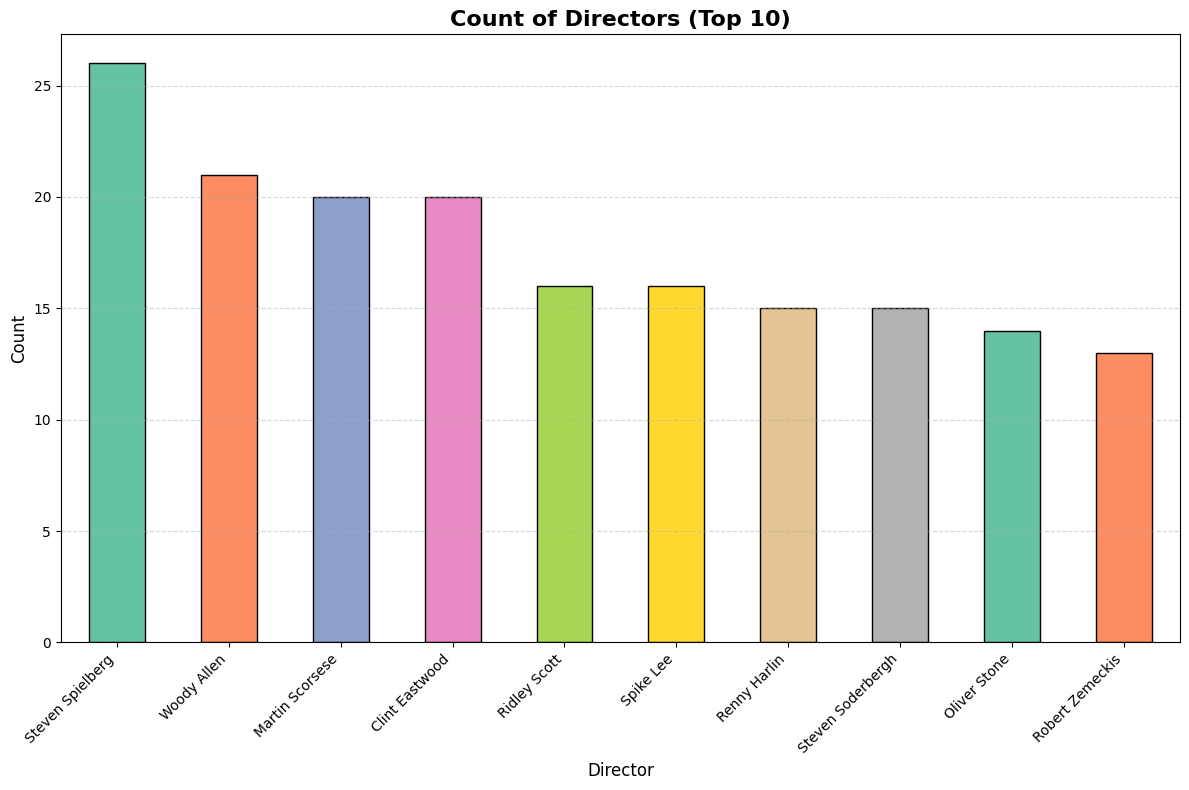

In [41]:
# Using Seaborn's color palette for a more visually appealing look
colors = sns.color_palette("Set2")

# Set up the figure with a specified size
plt.figure(figsize = (12, 8))

# Plot the top 10 director's counts as a bar chart with customized colors and added border
director_counts_10.plot(kind = 'bar', color = colors, edgecolor = 'black')

# Set the title of the plot
plt.title('Count of Directors (Top 10)', fontsize = 16, fontweight = 'bold')

# Set labels for x and y axes with increased font size
plt.xlabel('Director', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-labels for better readability
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)

# Add gridlines for better visualization on the y-axis
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()

In [42]:
# Count the occurrences of each producer in the 'Producer' column
producer_counts = df['Producer'].value_counts()
# Take the top 9 producers (excluding the most frequent one)
producer_counts_10 = producer_counts[1:10]

In [43]:
producer_counts_10

Producer
Neal H. Moritz                               12
Jerry Bruckheimer                            10
Brian Grazer                                  9
Danny DeVito Michael Shamberg Stacey Sher     8
Kevin Feige                                   8
John Davis                                    8
Jerry Bruckheimer Don Simpson                 8
Barbara Broccoli Michael G. Wilson            7
Menahem Golan Yoram Globus                    7
Name: count, dtype: int64

Using SeaBorn Library to get the Enhanced Visualization of the Producer Graph

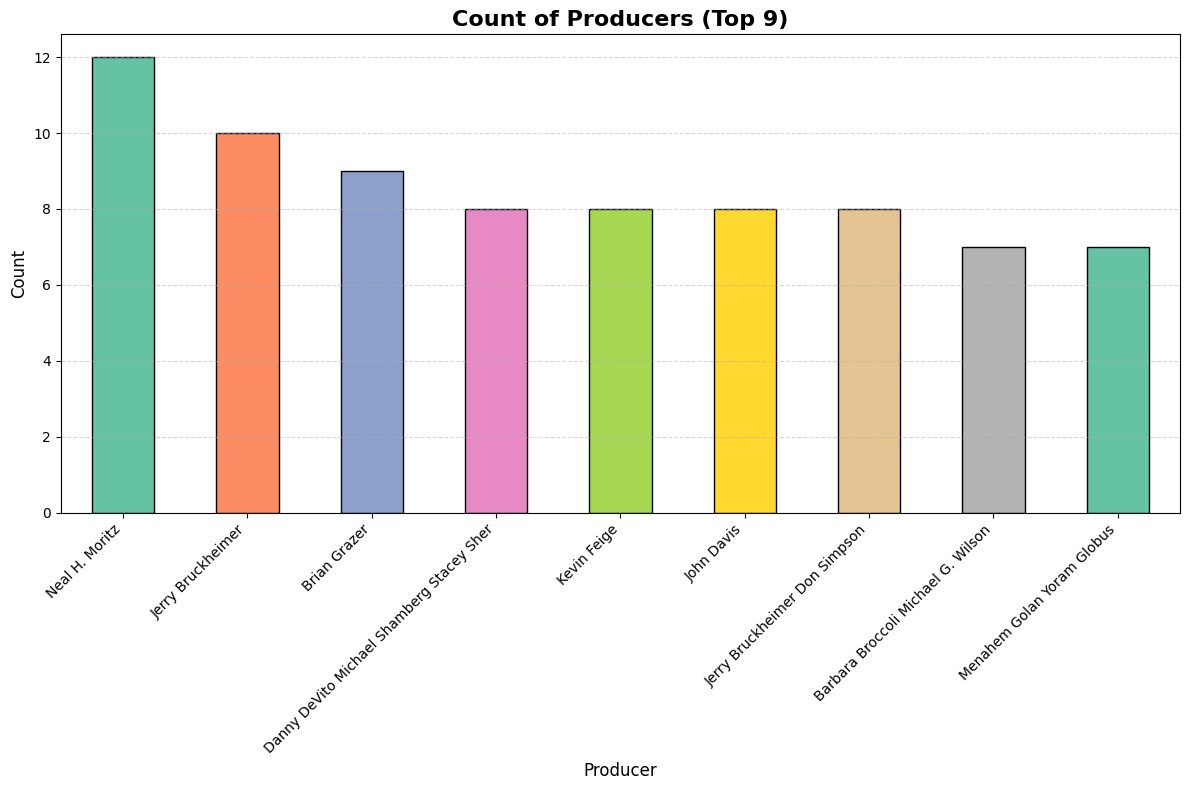

In [44]:
# Using Seaborn's color palette for a more visually appealing look
colors = sns.color_palette("Set2")

# Set up the figure with a specified size
plt.figure(figsize =(12, 8))

# Plot the top 9 producers' counts as a bar chart with customized colors and added border
producer_counts_10.plot(kind = 'bar', color = colors, edgecolor = 'black')

# Set the title of the plot
plt.title('Count of Producers (Top 9)', fontsize = 16, fontweight = 'bold')

# Set labels for x and y axes with increased font size
plt.xlabel('Producer', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

# Rotate x-labels for better readability
plt.xticks(rotation=45, ha = 'right', fontsize = 10)

# Add gridlines for better visualization on the y-axis
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()

Multi-Keywords Combination Function (Overview,Cast,Crew)

In [45]:
# To generate multi keyword combination function
def generate_keyword_combinations(overview, director,producer, cast):   
    # Initial combination is empty
    keyword_combinations = ""
    
    # Appending the combination of overview,cast and crew strings
    keyword_combinations += overview + " " + director + " " + producer +" "+cast
    
    return keyword_combinations

In [46]:
combined_keywords = []

# Loop through the DataFrame and generate combined keywords
for i in range(len(df)):
   # iloc is used to access the interger position of i variable
    combined_keywords.append(generate_keyword_combinations(
        df.iloc[i]['overview'],
        df.iloc[i]['Director'],
        df.iloc[i]['Producer'],
        df.iloc[i]['Filtered Cast'] 
    ))


In [47]:
# To check the length of combined keywords
len(combined_keywords)

4740

In [48]:
# To get the dimensions (no.of rows and columns) of the dataframe
df.shape

(4740, 10)

In [49]:
# To confirm that now it has 4 columns
df.head(1)

,id,title_x,genres,overview,cast,crew,All Genres,Director,Producer,Filtered Cast
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","Action,Adventure,Fantasy,ScienceFiction",James Cameron,James Cameron Jon Landau,Sam Worthington Zoe Saldana Sigourney Weaver


In [50]:
# To check the combined keywords of the first record (includes overview,cast and crew)
combined_keywords[0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. James Cameron James Cameron Jon Landau Sam Worthington Zoe Saldana Sigourney Weaver'

In [51]:
# To count the occurrences of each unique genres
df['All Genres'].value_counts()

All Genres
Drama                                                367
Comedy                                               281
Drama,Romance                                        164
Comedy,Romance                                       144
Comedy,Drama                                         142
                                                    ... 
Animation,Family,Comedy,Adventure,Fantasy,Romance      1
Crime,Mystery,Thriller,Action                          1
Drama,Animation,Family,Comedy                          1
Action,Fantasy,Comedy                                  1
Comedy,Drama,Romance,TVMovie                           1
Name: count, Length: 1172, dtype: int64

In [52]:
df.head()

,id,title_x,genres,overview,cast,crew,All Genres,Director,Producer,Filtered Cast
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","Action,Adventure,Fantasy,ScienceFiction",James Cameron,James Cameron Jon Landau,Sam Worthington Zoe Saldana Sigourney Weaver
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","Adventure,Fantasy,Action",Gore Verbinski,Jerry Bruckheimer Eric McLeod Chad Oman Peter ...,Johnny Depp Orlando Bloom Keira Knightley
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","Action,Adventure,Crime",Sam Mendes,Barbara Broccoli Michael G. Wilson,Daniel Craig Christoph Waltz Léa Seydoux
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","Action,Crime,Drama,Thriller",Christopher Nolan,Charles Roven Christopher Nolan Emma Thomas,Christian Bale Michael Caine Gary Oldman
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","Action,Adventure,ScienceFiction",Andrew Stanton,Colin Wilson Jim Morris Lindsey Collins,Taylor Kitsch Lynn Collins Samantha Morton


Dropping the non-needed columns (overview,cast,crew)

In [53]:
df.drop(columns = ['genres', 'cast','crew'], inplace = True)

In [54]:
df.head()

,id,title_x,overview,All Genres,Director,Producer,Filtered Cast
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","Action,Adventure,Fantasy,ScienceFiction",James Cameron,James Cameron Jon Landau,Sam Worthington Zoe Saldana Sigourney Weaver
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","Adventure,Fantasy,Action",Gore Verbinski,Jerry Bruckheimer Eric McLeod Chad Oman Peter ...,Johnny Depp Orlando Bloom Keira Knightley
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"Action,Adventure,Crime",Sam Mendes,Barbara Broccoli Michael G. Wilson,Daniel Craig Christoph Waltz Léa Seydoux
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"Action,Crime,Drama,Thriller",Christopher Nolan,Charles Roven Christopher Nolan Emma Thomas,Christian Bale Michael Caine Gary Oldman
4,49529,John Carter,"John Carter is a war-weary, former military ca...","Action,Adventure,ScienceFiction",Andrew Stanton,Colin Wilson Jim Morris Lindsey Collins,Taylor Kitsch Lynn Collins Samantha Morton


In [55]:
# To drop/delete the old columns from the dataframe
df.drop(columns = ['overview', 'Director','Producer', 'Filtered Cast'], inplace = True)

In [56]:
df.head(2)

,id,title_x,All Genres
0,19995,Avatar,"Action,Adventure,Fantasy,ScienceFiction"
1,285,Pirates of the Caribbean: At World's End,"Adventure,Fantasy,Action"


In [57]:
df.head()

,id,title_x,All Genres
0,19995,Avatar,"Action,Adventure,Fantasy,ScienceFiction"
1,285,Pirates of the Caribbean: At World's End,"Adventure,Fantasy,Action"
2,206647,Spectre,"Action,Adventure,Crime"
3,49026,The Dark Knight Rises,"Action,Crime,Drama,Thriller"
4,49529,John Carter,"Action,Adventure,ScienceFiction"


In [58]:
df[df['All Genres'] == "Action,Adventure,Fantasy,ScienceFiction"]

,id,title_x,All Genres
0,19995,Avatar,"Action,Adventure,Fantasy,ScienceFiction"
14,49521,Man of Steel,"Action,Adventure,Fantasy,ScienceFiction"
46,127585,X-Men: Days of Future Past,"Action,Adventure,Fantasy,ScienceFiction"
813,1924,Superman,"Action,Adventure,Fantasy,ScienceFiction"
870,8536,Superman II,"Action,Adventure,Fantasy,ScienceFiction"
3492,27549,Beastmaster 2: Through the Portal of Time,"Action,Adventure,Fantasy,ScienceFiction"


Adding a new feature column to store the Keyword Combinations

In [59]:
# To add the keyword combination as the column to the dataframe
df['keyword_combinations'] = combined_keywords

Renaming the column title_x into title

In [60]:
# To rename the title column
df.rename(columns = {'title_x':'title'}, inplace = True)

Checking the updated dataframe information for the first record

In [61]:
# To check the updated available columns of the dataframe
df.head(1)

,id,title,All Genres,keyword_combinations
0,19995,Avatar,"Action,Adventure,Fantasy,ScienceFiction","In the 22nd century, a paraplegic Marine is di..."


TRAINING OF THE MACHINE LEARNING MODEL

TEXT REPRESENTATION ALGORITHM - TF-IDF & TEXT SIMILARITY ALGORITHM - COSINE SIMILARITY

Removing the Common English Stop Words & Transforming the Keyword Combinations to Numerical Vector Format

In [62]:
# To remove common english words like (and,or,the,is etc.) using stop_words
tfidf = TfidfVectorizer(stop_words='english')
# To convert the keyword combinations into the numerical vector format using TF-IDF
tfidf_matrix = tfidf.fit_transform(df['keyword_combinations'])

Checking the DataFrame Shape

In [63]:
df.shape

(4740, 4)

Checking the Matrix Shape (4740 movies with 28877 Word Vectors)

In [64]:
# To get the number of rows and columns of the matrix 
# Now there are 4740 movies and 28877 word vectors for each movie
tfidf_matrix.shape

(4740, 28877)

Applying Linear Kernel to calculate the linear kernel between vectors

In [65]:
# To compute the cosine similarity matirx
cos_mat = linear_kernel(tfidf_matrix, tfidf_matrix)

In [66]:
# To know the cosine matrix dimensions
cos_mat.shape

(4740, 4740)

RECOMMENDATION BASED ON MOVIE TITLE

In [67]:
# To get movie recommendations based on title as input
def get_recommendations(movie, n):
    
    # To get index of the input movie from the dataframe
    index = df[df['title']== movie].index[0]
    
    # To sort similar movies in descending order of similarity (first with 1 and remaining are less than 1 - since cosine similarity can be either 0 or 1 where 1 means higher similarity)     
    similar_movies = sorted(list(enumerate(cos_mat[index])), reverse = True, key = lambda x: x[1]) 
    
    # To extract names from dataframe and return the movie names
    recomm = []
    for i in similar_movies[1:n+1]:
        # iloc is used to access the interger position of i variable
        recomm.append(df.iloc[i[0]].title)
        
    return recomm

In [68]:
# Calling the function
get_recommendations("Interstellar", 5)

['The Prestige',
 'Inception',
 'The Dark Knight',
 'The Dark Knight Rises',
 'How to Lose a Guy in 10 Days']

In [69]:
# Calling the function
get_recommendations("Harry Potter and the Half-Blood Prince", 5)

['Harry Potter and the Order of the Phoenix',
 'Harry Potter and the Goblet of Fire',
 'Harry Potter and the Chamber of Secrets',
 'Harry Potter and the Prisoner of Azkaban',
 "Harry Potter and the Philosopher's Stone"]

RECOMMENDATION BASED ON MULTIPLE KEYWORDS

In [70]:
# To get movie recommendations based on keywords(overview,cast,crew) as input
def get_keywords_recommendations(keywords, n):

    # To split the keywords into individual words of the list
    keywords = keywords.split()
    # To rejoin the elements from the list to string using space " "
    keywords = " ".join(keywords)
    
    # To transform the joined string to vector representation using TF-IDF
    key_tfidf = tfidf.transform([keywords]) 
    
    # To compute cosine similarity based on the vectors   
    result = cosine_similarity(key_tfidf, tfidf_matrix)
    
    # To sort similar movies in the descending order of similarity   
    similar_movies = sorted(list(enumerate(result[0])), reverse = True, key = lambda x: x[1])
    
    # To extract the names from the dataframe and return movie names
    recomm = []
    for i in similar_movies[1:n+1]:
        # iloc is used to access the interger position of i variable
        recomm.append(df.iloc[i[0]].title)
        
    return recomm

In [71]:
# Recommendation based on Cast
get_keywords_recommendations("Daniel Radcliffe", 5)

['Harry Potter and the Chamber of Secrets',
 'Victor Frankenstein',
 'Harry Potter and the Half-Blood Prince',
 'Mrs. Doubtfire',
 'Harry Potter and the Order of the Phoenix']

In [72]:
# Recommendation based on Crew
get_keywords_recommendations("Christopher Nolan", 5)

['Interstellar',
 'Inception',
 'The Dark Knight',
 'The Dark Knight Rises',
 'Insomnia']

In [73]:
# Recommendation based on Overview
get_keywords_recommendations("Captain Jack Sparrow", 5)

['Pirates of the Caribbean: The Curse of the Black Pearl',
 'Pirates of the Caribbean: On Stranger Tides',
 'Highway',
 'Ladder 49',
 'Joyful Noise']

In [74]:
# To check the column information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4740 entries, 0 to 4739
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    4740 non-null   int64 
 1   title                 4740 non-null   object
 2   All Genres            4740 non-null   object
 3   keyword_combinations  4740 non-null   object
dtypes: int64(1), object(3)
memory usage: 148.3+ KB


MLB - Conversion of Binary Genre Matrix Representation

In [75]:
df_genres = df['All Genres']

In [76]:
# Split each value in the 'All Genres' column by comma and create a list of genres for each row
genres_list = [genre.split(",") for genre in df['All Genres']]

In [77]:
# To help in binary matrix genre text representation
mlb = MultiLabelBinarizer()

genre_matrix = mlb.fit_transform(genres_list)

KNN - For classification of genre matrix

In [78]:
# To initialize the KNN model which has 5 nearest neighbours for recommendation
knn = NearestNeighbors(n_neighbors=5, metric='cosine')

# To train the KNN model on the genre matrix
knn.fit(genre_matrix)

NearestNeighbors(metric='cosine')

RECOMMENDATION BASED ON GENRES

In [79]:
# To get movie recommendations based on genres by giving title as input
def get_genre_recommendations(movie_title, n):

    # To check if the movie title exists in the Data Frame
    if movie_title not in df['title'].values:
        return f"Movie '{movie_title}' not found in the database."

    # To get the particular movie index searched
    index = df[df['title'] == movie_title].index[0]

    # To calculate the nearest neighbors based on genre using KNN algorithm
    indices = knn.kneighbors([genre_matrix[index]])

    # To extract the recommended movies based on genre
    recommended_movies = []
    for i in indices[1][0][1:n+1]:
        recommended_movies.append(df.iloc[i]['title'])

    return recommended_movies

In [80]:
# Get genre-based recommendations for a movie
recommendations = get_genre_recommendations("Avatar", 5)
print(recommendations)

['Beastmaster 2: Through the Portal of Time', 'Superman Returns', 'Superman II', 'Man of Steel']


HYBRID WEIGHTED SUM CBF RECOMMENDATION BASED ON MULTIPLE KEYWORDS AND GENRES 

In [81]:
# To get movie recommendations by the hybrid approach - weighted sum (keywords and genres)
def combined_recommendations(movie_title, keywords, n, keyword_weight = 0.4):

    # To call and get recommendations from both methods
    keyword_rec = get_keywords_recommendations(keywords, n)
    genre_rec = get_genre_recommendations(movie_title, n)

    # To create a dictionary to store movie recommendations and their scores
    recommendations = {}

    # To assign scores to movies based on keyword-based recommendations
    for movie in keyword_rec:
        # It updates the weighted score of the keywords, if movie is not present default is 0
        recommendations[movie] = recommendations.get(movie, 0) + keyword_weight

    # To assign scores to movies based on genre-based recommendations
    for movie in genre_rec:
         # It updates the weighted score of the genres, if movie is not present default is 0
         # 1 - score to give less weight to movies recommended by keywords
        recommendations[movie] = recommendations.get(movie, 0) + (1 - keyword_weight)

    # To sort movies in descending order by their combined scores
    combined_rec = sorted(recommendations.items(), key = lambda x: x[1], reverse = True)

    # To return the recommended movies to the user
    return [movie[0] for movie in combined_rec[:n]]

combined_rec = combined_recommendations("Avatar","Christopher Nolan",5)
print("Combined Recommendations:")
print(combined_rec)

Combined Recommendations:
['Beastmaster 2: Through the Portal of Time', 'Superman Returns', 'Superman II', 'Man of Steel', 'Interstellar']


Finalizing the Data needed to Dump as a Binary Joblib File

In [82]:
df

,id,title,All Genres,keyword_combinations
0,19995,Avatar,"Action,Adventure,Fantasy,ScienceFiction","In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Adventure,Fantasy,Action","Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,"Action,Adventure,Crime",A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,"Action,Crime,Drama,Thriller",Following the death of District Attorney Harve...
4,49529,John Carter,"Action,Adventure,ScienceFiction","John Carter is a war-weary, former military ca..."
...,...,...,...,...
4735,14337,Primer,"ScienceFiction,Drama,Thriller",Friends/fledgling entrepreneurs invent a devic...
4736,9367,El Mariachi,"Action,Crime,Thriller",El Mariachi just wants to play his guitar and ...
4737,72766,Newlyweds,"Comedy,Romance",A newlywed couple's honeymoon is upended by th...
4738,231617,"Signed, Sealed, Delivered","Comedy,Drama,Romance,TVMovie","""Signed, Sealed, Delivered"" introduces a dedic..."


In [83]:
cos_mat

array([[1.        , 0.        , 0.01586595, ..., 0.        , 0.        ,
        0.0106455 ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.02440568,
        0.        ],
       [0.01586595, 0.        , 1.        , ..., 0.        , 0.0112317 ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.02440568, 0.0112317 , ..., 0.        , 1.        ,
        0.0047846 ],
       [0.0106455 , 0.        , 0.        , ..., 0.        , 0.0047846 ,
        1.        ]])

In [84]:
tfidf

TfidfVectorizer(stop_words='english')

In [85]:
tfidf_matrix

<4740x28877 sparse matrix of type '<class 'numpy.float64'>'
	with 178790 stored elements in Compressed Sparse Row format>

Saving the Matrix and DataFrame as Binary Files

In [86]:
joblib.dump(df, '../models/movie_db.df')
joblib.dump(cos_mat, '../models/cos_mat.mt')
joblib.dump(tfidf, '../models/vectorizer.tf')
joblib.dump(tfidf_matrix, '../models/tfidf_mat.tf')

['../models/tfidf_mat.tf']

Testing Metrics Calculation 

In [87]:
# Define function to calculate precision
def precision(actual, recommended):
     # Calculate the intersection of actual and recommended items
    intersection = len(set(actual).intersection(set(recommended)))
     # Calculate precision as the ratio of the intersection to the total recommended items
    return intersection / len(actual) if len(actual) != 0 else " "

# Define function to calculate recall
def recall(actual, recommended):
    # Calculate the intersection of actual and recommended items
    intersection = len(set(actual).intersection(set(recommended)))
    # Calculate recall as the ratio of the intersection to the total actual items
    return intersection / len(actual) if len(actual) != 0 else " "

# Define function to calculate F1 score
def f1_score(precision, recall):
     # Handle the case where both precision and recall are zero to avoid division by zero
    if precision == 0 and recall == 0:
        return 0.0
    # Calculate F1 score using the harmonic mean of precision and recall
    return 2 * (precision * recall) / (precision + recall)

def accuracy(actual, recommended):
    # Calculate the number of correct recommendations by finding the intersection of actual and recommended
    correct_predictions = len(set(actual).intersection(set(recommended)))
     # Calculate the total number of predictions
    total_predictions = len(recommended)
     # Return the accuracy, handling the case where there are no predictions to avoid division by zero
    return correct_predictions / total_predictions if total_predictions != 0 else " "

def confusion_matrix_metrics(actual, recommended):
    # Create confusion matrix
    cm = confusion_matrix(actual, recommended)
    
    # Plot confusion matrix using Seaborn
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot = True , fmt = 'd', cmap = 'Blues', cbar = False, 
                annot_kws = {'size': 14}, linewidths=0.5, square=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

Precision: 0.6
Recall: 0.6
F1 Score: 0.6
Accuracy: 0.6


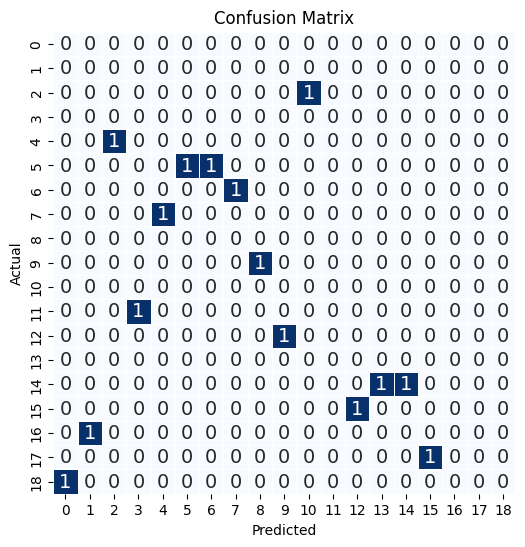

In [88]:
# Giving ground truth values
actual_movies = ['Interstellar', 'Inception', 'The Dark Knight', 'The Dark Knight Rises', 'Insomnia',
'Man of Steel','The Dark Knight','Transcendence','Insomnia','The Prestige','Memento','X-Men: Days of Future Past','Superman','Superman II','Beastmaster 2: Through the Portal of Time']
recommended_movies = combined_recommendations("Avatar","Christopher Nolan",15)

# Calculate evaluation metrics
precision_value = precision(actual_movies, recommended_movies)
recall_value = recall(actual_movies, recommended_movies)
f1_score_value = f1_score(precision_value, recall_value)
accuracy_value = accuracy(actual_movies, recommended_movies)

# Print evaluation metrics
print("Precision:", precision_value)
print("Recall:", recall_value)
print("F1 Score:", f1_score_value)
print("Accuracy:", accuracy_value)
confusion_matrix_metrics(actual_movies, recommended_movies)